## Here's an attempt at creating a pass map, using Stats Bomb data 

### This notebook is my first attempt at a pass map, and details my workflow - use Pass-Map-Generator in order to produce new content

In [16]:
import json

with open("8658.json",'r') as f:
    data = json.load(f) #loads json in form of dictionaries 
    f.close()
    
    
startLocation = []
endLocation = []

passData = []
eventData = []
startLocation = []
endLocation = []
player = ""
complete = True


    # Pass data - [pass, player, start location, end location, outcome]
    
    # I'm trying this out with a random data point at first
    
if("pass" in data[4]):
    startLocation = data[4]["location"]
    endLocation = data[4]["pass"]["end_location"]
    player = data[4]["player"]["name"]
    if("outcome" in data[4]['pass']):
        complete = false;        
    eventData = [player, startLocation, endLocation, complete]
    passData.append(eventData)
    
print(passData)
        

[['Mario Mandžukić', [61.0, 41.0], [50.0, 42.0], True]]


In [30]:
# Let's scale up 

passData = []
eventData = []
startLocation = []
endLocation = []
player = ""
complete = True

#Here's a succesful breakdown of all passes 

for i in range(0, len(data)):
    if("pass" in data[i]):
        startLocation = data[i]["location"]
        endLocation = data[i]["pass"]["end_location"]
        player = data[i]["player"]["name"]
        if("outcome" in data[i]['pass']):
            complete = False
        else:
            complete = True
        eventData = [player, startLocation, endLocation, complete]
        passData.append(eventData)
             
print(passData)    

[['Mario Mandžukić', [61.0, 41.0], [50.0, 42.0], True], ['Marcelo Brozović', [49.0, 41.0], [44.0, 51.0], True], ['Luka Modrić', [43.0, 56.0], [42.0, 79.0], True], ['Šime Vrsaljko', [38.0, 78.0], [10.0, 49.0], True], ['Danijel Subašić', [9.0, 49.0], [73.0, 45.0], False], ['Raphaël Varane', [48.0, 50.0], [48.0, 60.0], False], ['Ivan Perišić', [73.0, 21.0], [61.0, 25.0], True], ['Ivan Rakitić', [60.0, 18.0], [68.0, 2.0], True], ['Ivan Strinić', [69.0, 2.0], [65.0, 27.0], True], ['Marcelo Brozović', [69.0, 24.0], [66.0, 22.0], True], ['Ivan Perišić', [63.0, 21.0], [51.0, 24.0], True], ['Domagoj Vida', [49.0, 30.0], [56.0, 33.0], True], ['Luka Modrić', [56.0, 33.0], [46.0, 30.0], True], ['Domagoj Vida', [48.0, 27.0], [53.0, 17.0], True], ['Ivan Rakitić', [47.0, 17.0], [37.0, 25.0], True], ['Domagoj Vida', [37.0, 26.0], [35.0, 45.0], True], ['Dejan Lovren', [40.0, 49.0], [56.0, 15.0], True], ['Ivan Rakitić', [55.0, 12.0], [69.0, 20.0], True], ['Benjamin Pavard', [49.0, 80.0], [46.0, 61.0], T

In [32]:
# Now let's try getting a single player's passes 
def getPlayersPasses(player):
    
    playerPasses= []
    
    for i in range(0, len(passData)):
        if(passData[i][0] == player):
            playerPasses.append(passData[i])
    
    return playerPasses


print(getPlayersPasses("Paul Pogba"))
            
    

[['Paul Pogba', [57.0, 76.0], [98.0, 66.0], False], ['Paul Pogba', [34.0, 55.0], [26.0, 29.0], True], ['Paul Pogba', [54.0, 46.0], [60.0, 74.0], True], ['Paul Pogba', [68.0, 53.0], [80.0, 20.0], True], ['Paul Pogba', [78.0, 5.0], [62.0, 6.0], True], ['Paul Pogba', [48.0, 34.0], [56.0, 75.0], True], ['Paul Pogba', [64.0, 35.0], [90.0, 50.0], True], ['Paul Pogba', [37.0, 8.0], [46.0, 20.0], True], ['Paul Pogba', [38.0, 61.0], [38.0, 77.0], True], ['Paul Pogba', [43.0, 68.0], [49.0, 78.0], True], ['Paul Pogba', [64.0, 38.0], [80.0, 63.0], False], ['Paul Pogba', [22.0, 54.0], [18.0, 63.0], True], ['Paul Pogba', [47.0, 53.0], [98.0, 75.0], True], ['Paul Pogba', [65.0, 53.0], [78.0, 49.0], False], ['Paul Pogba', [56.0, 40.0], [66.0, 74.0], True], ['Paul Pogba', [39.0, 25.0], [101.0, 69.0], True], ['Paul Pogba', [58.0, 50.0], [65.0, 20.0], True], ['Paul Pogba', [64.0, 26.0], [98.0, 15.0], True], ['Paul Pogba', [64.0, 30.0], [65.0, 7.0], True], ['Paul Pogba', [59.0, 7.0], [56.0, 19.0], True], 

26.0


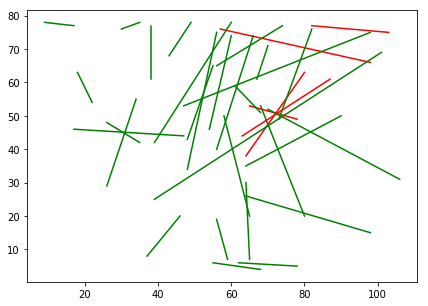

In [44]:
# ok time to do some heavy lifting - can i recreate a pass map?

# For now, lets get the passes on the plot, and color them according to whether they were completed


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

%matplotlib inline

pogbaPasses = getPlayersPasses("Paul Pogba")
print(pogbaPasses[1][2][0])



fig, ax = plt.subplots()
fig.set_size_inches(7,5)

#My arrays are as such - player name (0), start(x,y) (1), end(x,y) (2), complete (bool) (3)

for i in range(0, len(pogbaPasses)):
    
    xstart = int(pogbaPasses[i][1][0])
    xend = int(pogbaPasses[i][2][0])
    ystart = int(pogbaPasses[i][1][1])
    yend = int(pogbaPasses[i][2][1])
    if(pogbaPasses[i][3] == False):
        plt.plot([xstart, xend], [ystart, yend], color = "red")
    else:
        plt.plot([xstart, xend], [ystart, yend], color = "green")
    
       
    
plt.show()

## This next section adds the soccer field to the pass map

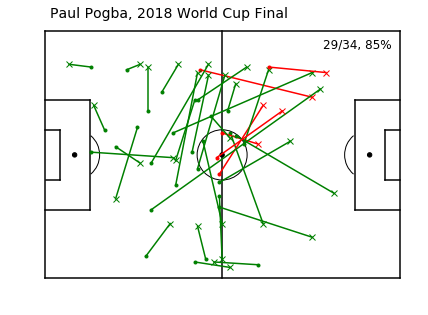

In [73]:
# Nice! Let's make things prettier



# This code is copied, it populates the plot with markings for a soccer field


#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')


#My arrays are as such - player name (0), start(x,y) (1), end(x,y) (2), complete (bool) (3)

for i in range(0, len(pogbaPasses)):
    
    xstart = int(pogbaPasses[i][1][0])
    xend = int(pogbaPasses[i][2][0])
    ystart = int(pogbaPasses[i][1][1])
    yend = int(pogbaPasses[i][2][1])
    if(pogbaPasses[i][3] == False):
        plt.plot([xstart, xend], [ystart, yend], color = "red")
        plt.plot(xstart, ystart, ".", color = "red")
        plt.plot(xend, yend, "x", color = "red")
    else:
        plt.plot([xstart, xend], [ystart, yend], color = "green")
        plt.plot(xstart, ystart, ".", color = "green")
        plt.plot(xend, yend, "x", color = "green")
    
       
ax.text(2,95,"Paul Pogba, 2018 World Cup Final",color="black",size="14")

# I want to try adding some pass percentage information as well 

def getPassStatistics(playerPasses):
    
    length = len(playerPasses)
    stats = [] # stats will contain complete passes, total passes, percentage
    complete = 0
    for i in range(0, length):
        if(playerPasses[i][3] == True):
            complete += 1
    
    stats.append(complete)
    stats.append(length)

    
    stats.append(int(complete/length*100))
    
    return stats


pogbaPassStats = getPassStatistics(pogbaPasses)

#Put this on the plot 
percentageText = f"{pogbaPassStats[0]}/{pogbaPassStats[1]}, {pogbaPassStats[2]}% "
ax.text(102, 84, percentageText, color = "black", size = "12")


plt.show()